### Map Exercise

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [4]:
cols =[
    "enterprise_flag",
    "record_number",
    "state_code",
    "msa_code",
    "county_2020",
    "census_tract_2020",
    "tract_pct_minority",
    "tract_median_income",
    "local_median_income",
    "tract_income_ratio",
    "borrower_income",
    "borrower_income_missing",
    "borrower_housing_expense",
    "borrower_housing_expense_missing",
    "borrower_total_debt_expense",
    "borrower_total_debt_expense_missing",
    "borrower_credit_score",
    "borrower_credit_score_missing",
    "ltv_ratio",
    "cltv_ratio",
    "dti_ratio",
    "occupancy_status",
    "first_time_homebuyer",
    "loan_purpose",
    "property_type",
    "num_units",
    "num_units_missing",
    "affordable_units",
    "amortization_type",
    "loan_type",
    "lien_status",
    "channel",
    "property_valuation_method",
    "property_value",
    "property_value_missing",
    "interest_rate",
    "interest_rate_missing",
    "loan_term",
    "loan_term_missing",
    "prepayment_penalty",
    "prepayment_penalty_term",
    "prepayment_penalty_term_missing",
    "balloon_payment",
    "interest_only_payment",
    "negative_amortization",
    "property_state_code",
    "property_county_code",
    "property_census_tract",
    "property_zip_code",
    "property_street_address",
    "property_city",
    "property_state",
    "property_zip_plus4",
    "property_legal_description",
    "property_appraisal_date",
    "property_appraisal_date_missing",
    "property_appraisal_value",
    "property_appraisal_value_missing",
    "property_appraisal_method",
    "property_appraisal_method_missing",
    "property_appraisal_review_date",
    "property_appraisal_review_date_missing",
    "property_appraisal_review_value",
    "property_appraisal_review_value_missing"
]

In [5]:
fhlmc_sf2018 = pd.read_csv('data/fhlmc_sf2018c_loans.txt', sep=r'\s+', header=None, names = cols)
fnma_sf2018 = pd.read_csv('data/fnma_sf2018c_loans.txt', sep=r'\s+', header=None, names = cols)
sf_loans_2018 = pd.concat([fhlmc_sf2018, fnma_sf2018])

FileNotFoundError: [Errno 2] No such file or directory: 'data/fhlmc_sf2018c_loans.txt'

In [37]:
tracts = gpd.read_file('shapefiles/nhgis0008_shape/nhgis0008_shapefile_tl2023_us_tract_2023/US_tract_2023.shp')
# tracts['TRACTCE'] = tracts['TRACTCE'].astype(int)
sf_loans_2018['census_tract_2020'] = sf_loans_2018['census_tract_2020'].astype(int).apply(lambda x: f'{x:06d}')
tracts = tracts.merge(sf_loans_2018.groupby('census_tract_2020').size().reset_index(name='loan_count'), 
                      left_on='TRACTCE', right_on='census_tract_2020')

C:\Users\emers\AppData\Local\Temp\ipykernel_59328\1590151246.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Number of loans')


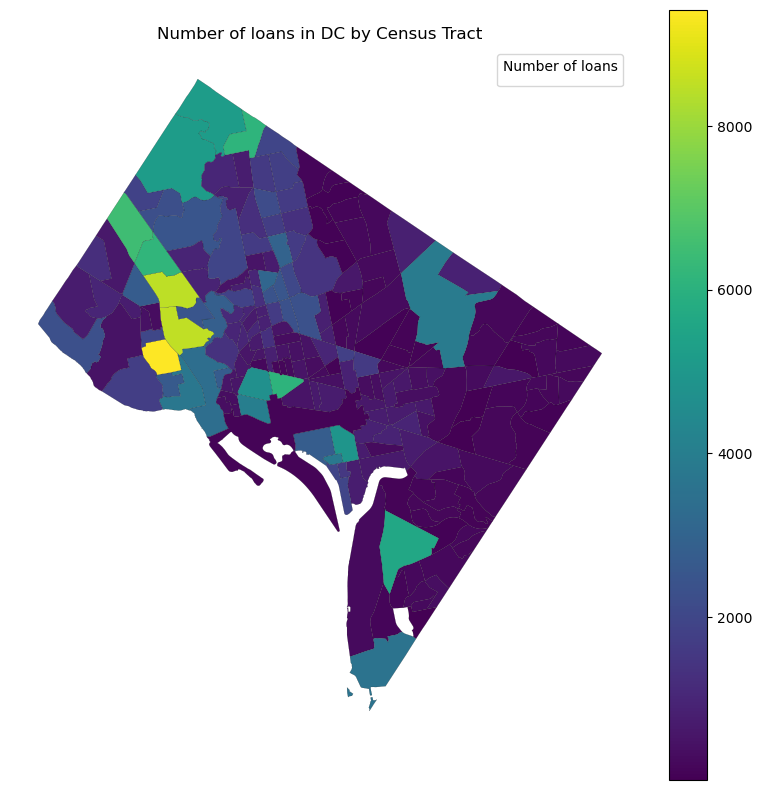

In [43]:
fig, gax = plt.subplots(figsize=(10, 10))
tracts.query("STATEFP == '11'").plot(ax=gax, 
                                     edgecolor='black', 
                                     linewidth=0.1, 
                                     cmap='viridis', 
                                     legend=True, 
                                     column='loan_count')

plt.title('Number of loans in DC by Census Tract')
plt.axis('off')
plt.legend(title='Number of loans')